In [1]:
import pandas as pd
import numpy as np

#### Checking the data

In [2]:
appointments_regional = pd.read_csv('appointments_regional.csv')
print(appointments_regional.dtypes)
print(appointments_regional.describe())
print(appointments_regional.isna().any(axis=1).sum())

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
       count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000
0


In [3]:
appointments_regional

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [4]:
appointments_regional.columns

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')

In [5]:
actual_duration = pd.read_csv('actual_duration.csv')
print(actual_duration.dtypes)
print(actual_duration.describe())
emptied = actual_duration.isna().any(axis=1)
print(emptied.shape)

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
       count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000
(137793,)


In [6]:
actual_duration.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [7]:
actual_duration.columns

Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')

In [8]:
duplicates_subset = actual_duration.duplicated(subset=['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'])
print(actual_duration[duplicates_subset])

Empty DataFrame
Columns: [sub_icb_location_code, sub_icb_location_ons_code, sub_icb_location_name, icb_ons_code, region_ons_code, appointment_date, actual_duration, count_of_appointments]
Index: []


In [9]:
nat_categories = pd.read_excel('national_categories.xlsx')

In [10]:
print(nat_categories.dtypes)
print(nat_categories.describe())
nat_emptied = nat_categories.isna().any(axis=1)
print(nat_emptied.shape)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
       count_of_appointments
count          817394.000000
mean              362.183684
std              1084.576600
min                 1.000000
25%                 7.000000
50%                25.000000
75%               128.000000
max             16590.000000
(817394,)


In [11]:
nat_categories.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [12]:
duplicates_subset = nat_categories.duplicated(subset=['appointment_date', 'icb_ons_code', 'sub_icb_location_name', 'service_setting', 'context_type', 'national_category', 'count_of_appointments', 'appointment_month'])
print(nat_categories[duplicates_subset])

Empty DataFrame
Columns: [appointment_date, icb_ons_code, sub_icb_location_name, service_setting, context_type, national_category, count_of_appointments, appointment_month]
Index: []


# ASSIGNMENT 2

# 1. How many locations are there in the data set?

In [13]:
#Accessing the data for the locations
collect_location = actual_duration['sub_icb_location_name']
collect_location = collect_location.fillna('')
#Using the split method in combination with Lamda(for loop) to split the text to access the unique 
cleaned_locations = collect_location.apply(lambda x: x.split('-')[0].strip()).unique()


#using the key value syntax along with enumerate the key(index) and the value(cleaned location)
for index, every in enumerate(cleaned_locations):
    index += 1
    print(f'{index}. {every}\n')

1. NHS North East and North Cumbria ICB

2. NHS Lancashire and South Cumbria ICB

3. NHS Greater Manchester ICB

4. NHS Cheshire and Merseyside ICB

5. NHS South Yorkshire ICB

6. NHS Nottingham and Nottinghamshire ICB

7. NHS West Yorkshire ICB

8. NHS Humber and North Yorkshire ICB

9. NHS Leicester Leicestershire and Rutland ICB

10. NHS Staffordshire and Stoke

11. NHS Cambridgeshire and Peterborough ICB

12. NHS Hertfordshire and West Essex ICB

13. NHS Suffolk and North East Essex ICB

14. NHS Mid and South Essex ICB

15. NHS Sussex ICB

16. NHS Buckinghamshire Oxfordshire and Berkshire West ICB

17. NHS Hampshire and Isle Of Wight ICB

18. NHS Dorset ICB

19. NHS Gloucestershire ICB

20. NHS Cornwall and The Isles Of Scilly ICB

21. NHS Somerset ICB

22. NHS Bristol North Somerset and South Gloucestershire ICB

23. NHS Birmingham and Solihull ICB

24. NHS Derby and Derbyshire ICB

25. NHS Devon ICB

26. NHS Herefordshire and Worcestershire ICB

27. NHS Norfolk and Waveney ICB

2

# 2. What are the five locations with the highest number of records?

In [14]:
location_counts = actual_duration['sub_icb_location_name'].apply(lambda x: x.split('-')[0].strip()).value_counts()

#Using [:] able iteriate over the needed data
location_counts[0:5]

NHS Greater Manchester ICB              12668
NHS Cheshire and Merseyside ICB         10636
NHS North East and North Cumbria ICB     9938
NHS Lancashire and South Cumbria ICB     9808
NHS Humber and North Yorkshire ICB       7973
Name: sub_icb_location_name, dtype: int64

In [15]:
nayt_counch= nat_categories['sub_icb_location_name'].apply(lambda x: x.split('-')[0].strip()).value_counts()

nayt_counch[0:5]

NHS Greater Manchester ICB              59180
NHS Cheshire and Merseyside ICB         53744
NHS North East and North Cumbria ICB    53707
NHS Lancashire and South Cumbria ICB    43381
NHS West Yorkshire ICB                  42888
Name: sub_icb_location_name, dtype: int64

# 3 . How many service settings, context types, national categories, and appointment statuses are there?

In [16]:
categories = pd.read_excel('national_categories.xlsx', usecols=['service_setting', 'context_type', 'national_category'])
categories

,service_setting,context_type,national_category
0,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round
1,Other,Care Related Encounter,Planned Clinics
2,General Practice,Care Related Encounter,Home Visit
3,General Practice,Care Related Encounter,General Consultation Acute
4,General Practice,Care Related Encounter,Structured Medication Review
...,...,...,...
817389,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity
817390,Extended Access Provision,Care Related Encounter,Planned Clinics
817391,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure
817392,Extended Access Provision,Care Related Encounter,General Consultation Routine


In [17]:
def value_count(column_name):
    return categories[column_name].value_counts()

#value.counts shows the count of each value within the column selected in the for loop
for column_name in categories.columns:
    print(f"{column_name} counts:\n{value_count(column_name)}")
    print('\n')

service_setting counts:
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64


context_type counts:
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64


national_category counts:
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation exter

# ASSIGNMENT 3 

# 1. Between what dates were appointments scheduled? 

In [18]:
from datetime import *

In [19]:
new_data = actual_duration['appointment_date'] 
print(new_data.dtypes)

object


In [20]:
new_data_copy = new_data.copy()
new_data_copy = pd.to_datetime(new_data_copy)

In [21]:

min_date = new_data_copy.min()
max_date = new_data_copy.max()
formatted_dates = [min_date.strftime('%d of %B %Y'), max_date.strftime('%d of %B %Y')]
formatted_dates

['01 of December 2021', '30 of June 2022']

In [22]:
newest = new_data_copy.dt.strftime('%d of the %B %Y')
if len(formatted_dates) >= 2:
    #using [-1] i am able to go to the end of the data to get the last value
    print("Date were schedule between: {} to {}".format(newest.iloc[0], newest.iloc[-1]))
else:
    pass

Date were schedule between: 01 of the December 2021 to 30 of the June 2022


# 2. Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?

In [23]:
nat_setting = nat_categories[['appointment_date','sub_icb_location_name','service_setting']]

In [24]:
selected_rows = nat_setting[(nat_setting['appointment_date'] >= '2022-01-01') & (nat_setting['appointment_date'] <= '2022-06-01')]
print(selected_rows['appointment_date'].min())
print(selected_rows['appointment_date'].max())

2022-01-01 00:00:00
2022-06-01 00:00:00


In [25]:
# str.contain retrieves the rows where the NHS North West... is present.
new_information = selected_rows[selected_rows['sub_icb_location_name'].str.contains('NHS North West London ICB')]
new_information.head()

,appointment_date,sub_icb_location_name,service_setting
800289,2022-01-01,NHS North West London ICB - W2U3Z,Unmapped
800290,2022-01-01,NHS North West London ICB - W2U3Z,Primary Care Network
800291,2022-01-01,NHS North West London ICB - W2U3Z,Other
800292,2022-01-01,NHS North West London ICB - W2U3Z,General Practice
800293,2022-01-01,NHS North West London ICB - W2U3Z,Primary Care Network


In [26]:
service_setting_answer = new_information['service_setting'].value_counts()
service_setting_answer

General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: service_setting, dtype: int64

# 3.Which month had the highest number of appointments?

In [27]:
#using strfttime able to acces the date properties within the data column/ Groupby allows for a primary key

nat_categories['appointment_date'] = pd.to_datetime(nat_categories['appointment_date'])
high_num_appointment = nat_categories.groupby(nat_categories['appointment_date'].dt.strftime('%B'))['count_of_appointments'].agg('sum')
high_num_appointment

appointment_date
April        23913060
August       23852171
December     25140776
February     25355260
January      25635474
June         25828078
March        29595038
May          27495508
November     30405070
October      30303834
September    28522501
Name: count_of_appointments, dtype: int64

In [28]:
#.min and .max are aggregates that streamline the process.

print(' The month with the highest number of appointments is {} and the count is {}'.format(high_num_appointment.idxmax(),
                                                              high_num_appointment.max()))

 The month with the highest number of appointments is November and the count is 30405070


In [29]:
#.min and .max are aggregates that streamline the process.

print(' The month with the highest number of appointments is {} and the count is {}'.format(high_num_appointment.idxmin(),
                                                              high_num_appointment.min()))

 The month with the highest number of appointments is August and the count is 23852171


# 4. What was the total number of records per month?

In [30]:
new_record = nat_categories[['appointment_date','sub_icb_location_name','service_setting']]
new_record.head()

,appointment_date,sub_icb_location_name,service_setting
0,2021-08-02,NHS North East and North Cumbria ICB - 00L,Primary Care Network
1,2021-08-02,NHS North East and North Cumbria ICB - 00L,Other
2,2021-08-02,NHS North East and North Cumbria ICB - 00L,General Practice
3,2021-08-02,NHS North East and North Cumbria ICB - 00L,General Practice
4,2021-08-02,NHS North East and North Cumbria ICB - 00L,General Practice


In [31]:
df = pd.DataFrame()
df['count_of_record'] = new_record.groupby(new_record['appointment_date'].dt.strftime('%B'))['appointment_date'].transform('count')
df = df.drop_duplicates()
df = df.set_index(new_record['appointment_date'].dt.strftime('%B').unique())
print(df)

           count_of_record
August               69999
September            74922
October              74078
November             77652
December             72651
January              71896
February             71769
March                82822
April                70012
May                  77425
June                 74168


# ASSIGNMENT 4

###  Three visualisations : indicating the number of appointments per month for service settings, context types, and national categories.

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [33]:
activity_collect = nat_categories[['appointment_date','service_setting','context_type','national_category','count_of_appointments']]
activity_collect.head(1)

,appointment_date,service_setting,context_type,national_category,count_of_appointments
0,2021-08-02,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3


In [34]:
service_setting_count = activity_collect.groupby(activity_collect['appointment_date'].dt.strftime('%B'))['service_setting'].transform('count')
context_type_count = activity_collect.groupby(activity_collect['appointment_date'].dt.strftime('%B'))['context_type'].transform('count')
national_category_count = activity_collect.groupby(activity_collect['appointment_date'].dt.strftime('%B'))['national_category'].transform('count')
count_of_appointments_count = activity_collect.groupby(activity_collect['appointment_date'].dt.strftime('%B'))['count_of_appointments'].transform('sum')
new_df = pd.DataFrame({
    'service_setting_count': service_setting_count,
    'context_type_count': context_type_count,
    'national_category_count': national_category_count,
    'count_of_appointments': count_of_appointments_count
})
new_df = new_df.drop_duplicates()
new_df = new_df.set_index(activity_collect['appointment_date'].dt.strftime('%B').unique())
new_df.head()

,service_setting_count,context_type_count,national_category_count,count_of_appointments
August,69999,69999,69999,23852171
September,74922,74922,74922,28522501
October,74078,74078,74078,30303834
November,77652,77652,77652,30405070
December,72651,72651,72651,25140776


### Per service settings

In [35]:
#sidebar:  Struggled with the what the question was asking.

setting_count = activity_collect.groupby([activity_collect['appointment_date'].dt.strftime('%B'), 'service_setting'])['count_of_appointments'].sum().reset_index()
setting_count.columns = ['Month', 'Service_Setting', 'Count_of_Appointments']
setting_count.head()

,Month,Service_Setting,Count_of_Appointments
0,April,Extended Access Provision,192284
1,April,General Practice,21916791
2,April,Other,437402
3,April,Primary Care Network,606270
4,April,Unmapped,760313


/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_56042/1097806398.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month',


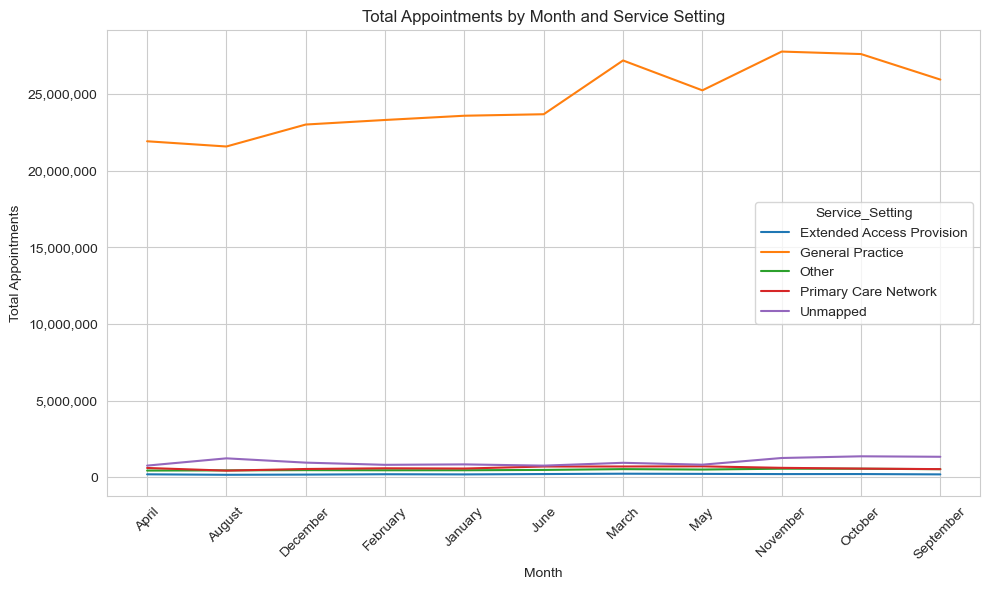

In [36]:
# This is the breakdown per service_setting in regards to the count_of appointments


sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x='Month',
             y='Count_of_Appointments',
             hue='Service_Setting',
             data=setting_count,
             ci=None)

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.title('Total Appointments by Month and Service Setting')

#Introduced the Func formatter because even though count was in int, 
#the y-axis was in decimal place.

def format_func(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()  
plt.show()


/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_56042/2455779209.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month',


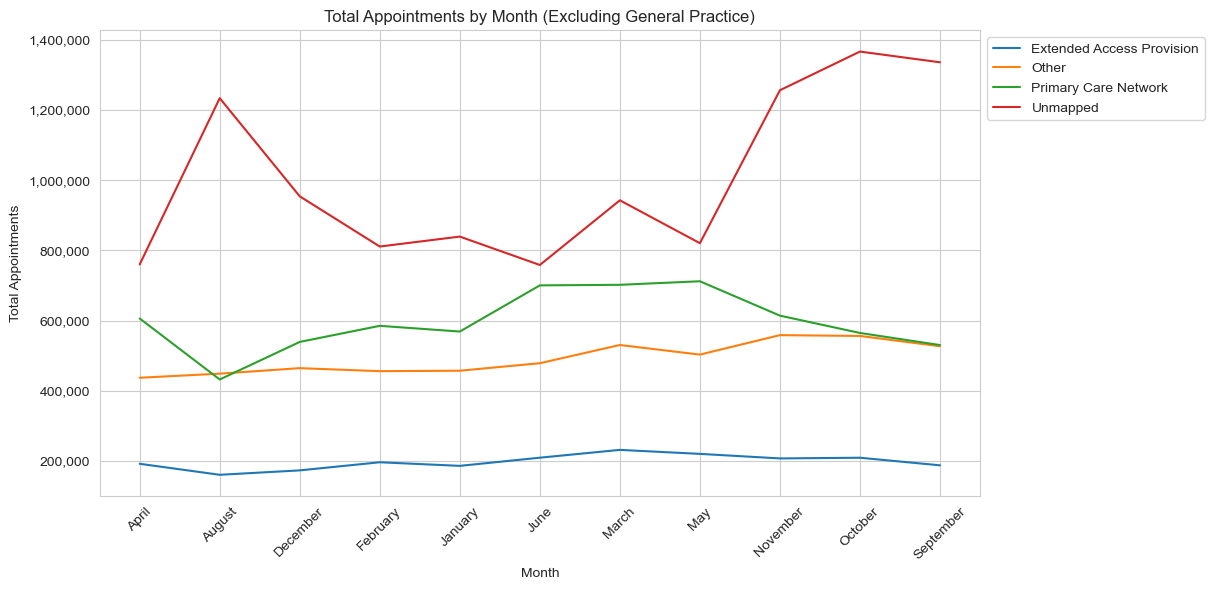

In [37]:
#Filter out the Genral practice to show the smaller data points
filtered_setting_count = setting_count[setting_count['Service_Setting'] != 'General Practice']

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x='Month',
             y='Count_of_Appointments',
             hue='Service_Setting',
             data=filtered_setting_count,
             ci=None)

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.title('Total Appointments by Month (Excluding General Practice)')
def format_func(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [38]:
activity_collect = activity_collect.copy()
activity_collect['appointment_date'] = pd.to_datetime(activity_collect['appointment_date'])
activity_collect['appointment_month'] = activity_collect['appointment_date'].dt.strftime('%B')
activity_collect.head()

,appointment_date,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,August
1,2021-08-02,Other,Care Related Encounter,Planned Clinics,7,August
2,2021-08-02,General Practice,Care Related Encounter,Home Visit,79,August
3,2021-08-02,General Practice,Care Related Encounter,General Consultation Acute,725,August
4,2021-08-02,General Practice,Care Related Encounter,Structured Medication Review,2,August


/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_56042/411237775.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_df.index,


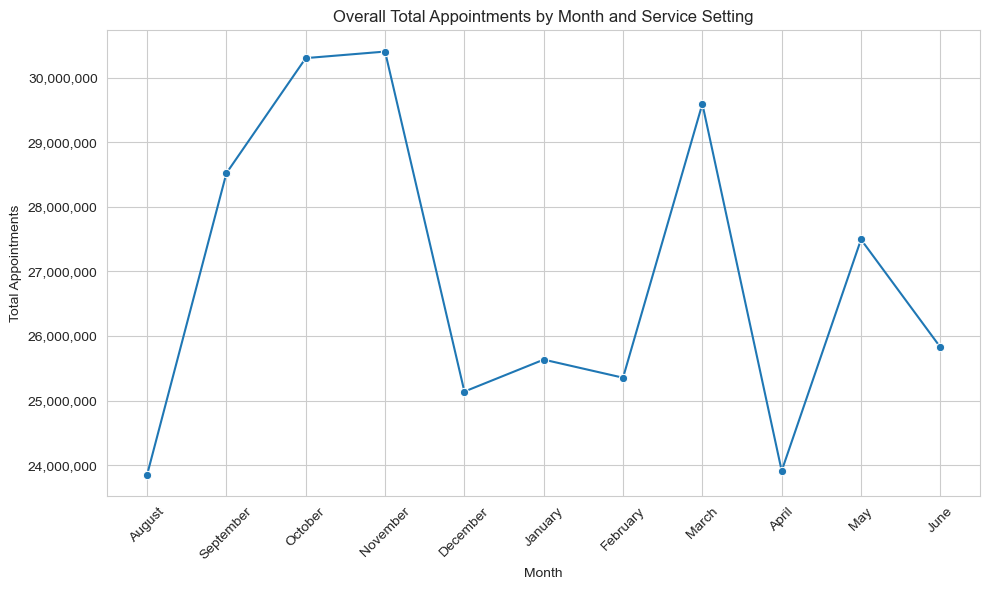

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x=new_df.index,
             y='count_of_appointments',
             data=new_df,
             marker = 'o',
             ci=None)

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.title('Overall Total Appointments by Month and Service Setting')
def format_func(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))


plt.tight_layout()
plt.show()

# Per ContextType

In [40]:
#gathering of the relevant_columns in a variable.
context_count = activity_collect.groupby([activity_collect['appointment_date'].dt.strftime('%B'), 'context_type'])['count_of_appointments'].sum().reset_index()
#named the columns
context_count.columns = ['Month', 'context_type', 'Count_of_Appointments']
context_count.head()

,Month,context_type,Count_of_Appointments
0,April,Care Related Encounter,20904193
1,April,Inconsistent Mapping,2248554
2,April,Unmapped,760313
3,August,Care Related Encounter,20255235
4,August,Inconsistent Mapping,2363093


/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_56042/616707497.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month',


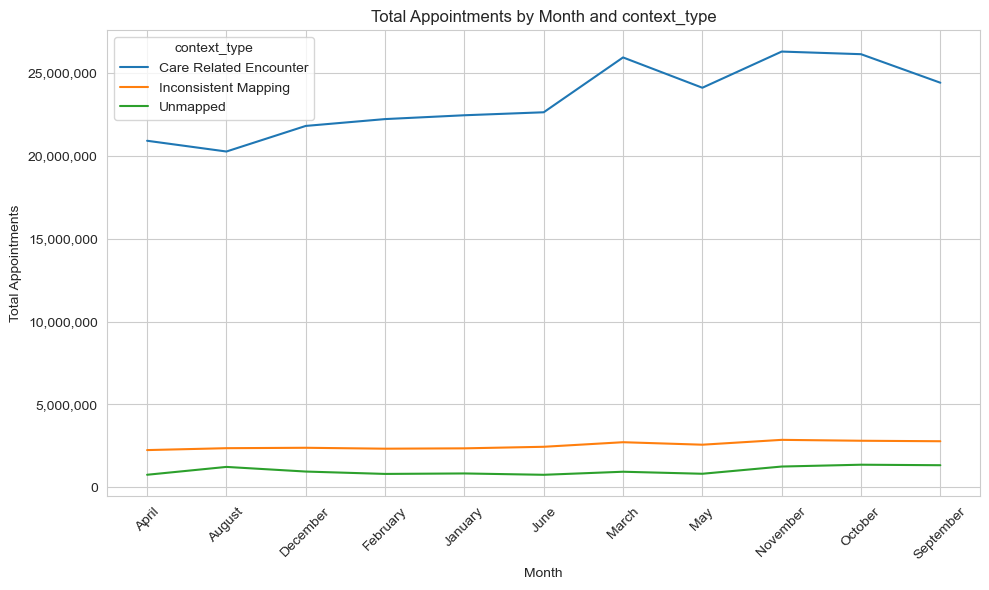

In [41]:
# This is the breakdown per service_setting in regards to the count_of appointments


sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x='Month',
             y='Count_of_Appointments',
             hue='context_type',
             data=context_count,
             ci=None)

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.title('Total Appointments by Month and context_type')

#Introduced the Func formatter because even though count was in int, 
#the y-axis was in decimal place.

def format_func(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()  
plt.show()

# Per national_category_count

In [42]:
national_count = activity_collect.groupby([activity_collect['appointment_date'].dt.strftime('%B'), 'national_category'])['count_of_appointments'].sum().reset_index()
national_count.columns = ['Month', 'national_category', 'Count_of_Appointments']

/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_56042/1991321994.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month',


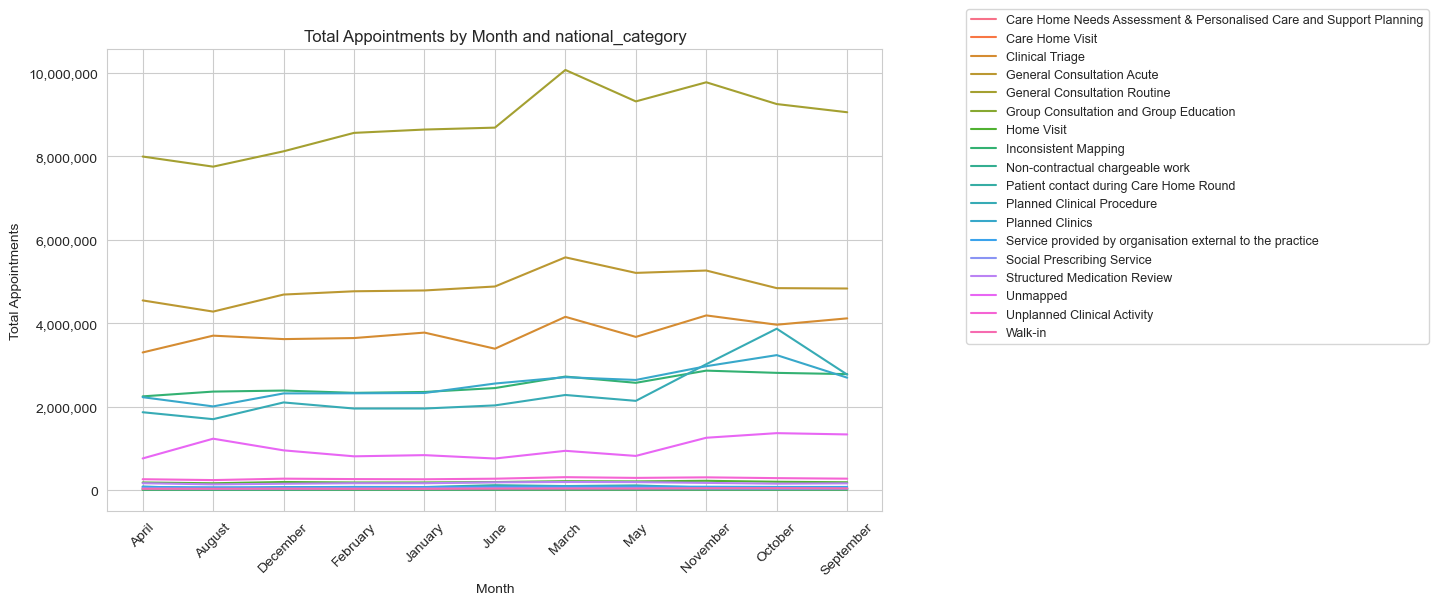

In [43]:
#This is the breakdown per service_setting in regards to the count_of appointments


sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x='Month',
             y='Count_of_Appointments',
             hue='national_category',
             data=national_count,
             ci=None)

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.title('Total Appointments by Month and national_category')

#Introduced the Func formatter because even though count was in int, 
#the y-axis was in decimal place.

def format_func(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.legend(loc='upper left', bbox_to_anchor=(1.1,1.1), prop={'size': 9}) 
plt.show()

# Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

In [44]:
activity_collect.head()

,appointment_date,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,August
1,2021-08-02,Other,Care Related Encounter,Planned Clinics,7,August
2,2021-08-02,General Practice,Care Related Encounter,Home Visit,79,August
3,2021-08-02,General Practice,Care Related Encounter,General Consultation Acute,725,August
4,2021-08-02,General Practice,Care Related Encounter,Structured Medication Review,2,August


In [45]:
nc_ss_day = nat_categories[['appointment_date', 'service_setting', 'context_type', 'national_category', 'count_of_appointments']].copy()
nc_ss_day['appointment_date'] = pd.to_datetime(nc_ss_day['appointment_date']) 
nc_ss_day['appointment_month'] = nc_ss_day['appointment_date'].dt.strftime('%B')

new_collect = nc_ss_day.groupby('appointment_month')['service_setting'].agg('count').reset_index()
new_collect = new_collect.set_index('appointment_month')
new_collect

,service_setting
appointment_month,
April,70012
August,69999
December,72651
February,71769
January,71896
June,74168
March,82822
May,77425
November,77652


In [46]:
#Gathered the relevant_columns in new_pad
new_pad = nat_categories[['appointment_date', 'service_setting', 'context_type', 'national_category', 'count_of_appointments']].copy()
new_pad['appointment_date'] = pd.to_datetime(new_pad['appointment_date']) 
#use the datetime to access the month and year 
new_pad['appointment_month'] = new_pad['appointment_date'].dt.strftime('%B %Y')

service_set_answer = new_pad.groupby(['appointment_month']) ['service_setting'].value_counts()
service_set_answer










appointment_month  service_setting          
April 2022         General Practice             30645
                   Primary Care Network         16240
                   Other                        11496
                   Extended Access Provision     9355
                   Unmapped                      2276
August 2021        General Practice             31381
                   Primary Care Network         14773
                   Other                        12294
                   Extended Access Provision     9023
                   Unmapped                      2528
December 2021      General Practice             32217
                   Primary Care Network         15915
                   Other                        12532
                   Extended Access Provision     9448
                   Unmapped                      2539
February 2022      General Practice             31224
                   Primary Care Network         16429
                   Other             

## Summer (August 2021)

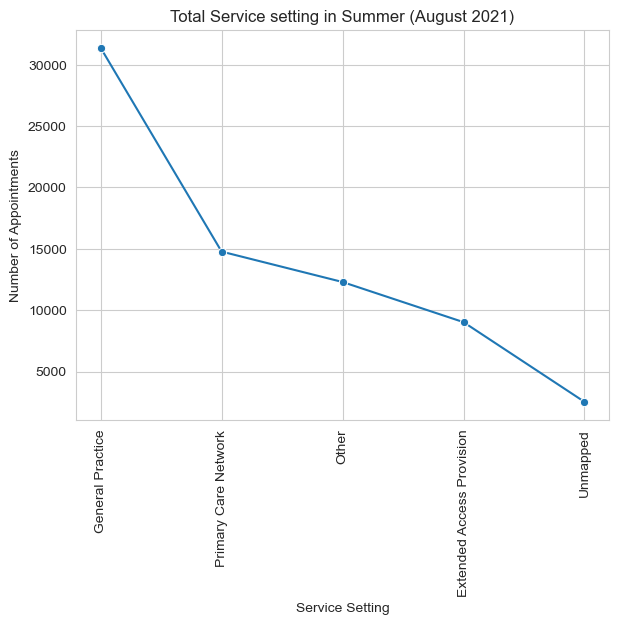

In [47]:
august_data = service_set_answer.loc['August 2021']

august_data_ax = sns.lineplot(x=august_data.index,
            y=august_data,
            data=august_data,
            marker = 'o')

#using list comprhension to acess the labels.
custom_labels = [key for key in august_data.index]


plt.title('Total Service setting in Summer (August 2021)')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


## Autumn (October 2021)

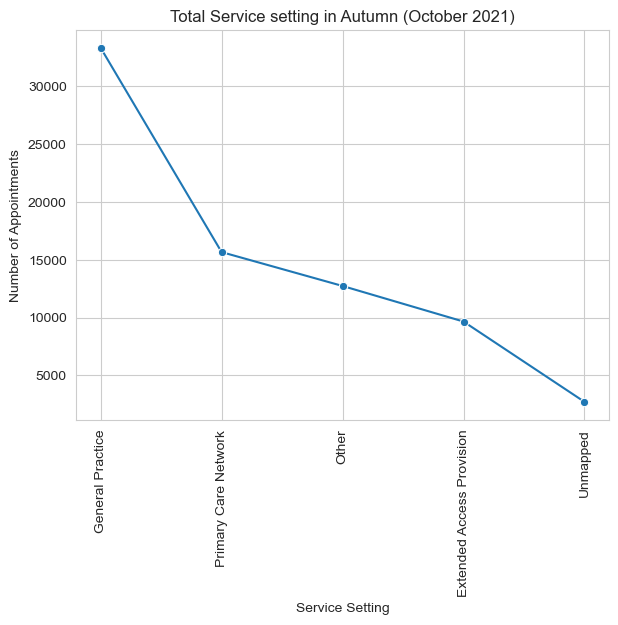

In [48]:
october_data = service_set_answer.loc['October 2021']

october_data_ax = sns.lineplot(x=october_data.index,
            y=october_data,
            data=october_data,
            marker = 'o')

custom_labels = [key for key in october_data.index]


plt.title('Total Service setting in Autumn (October 2021)')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## Winter (January 2022)

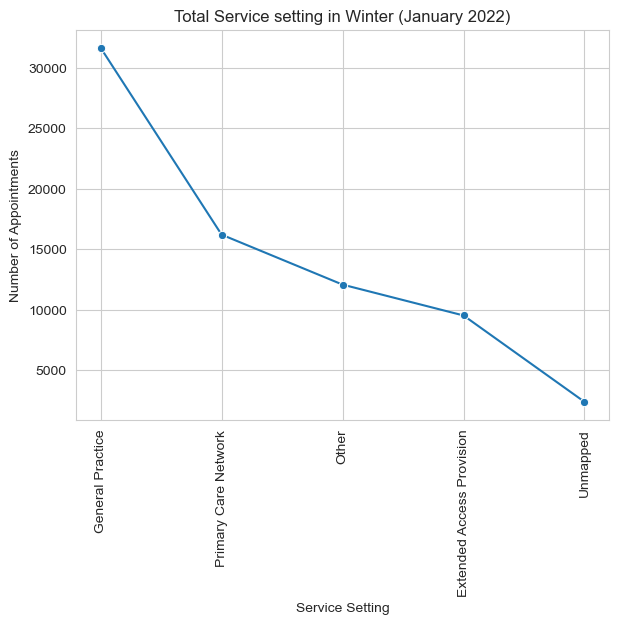

In [49]:
#service_set_answer.loc['January 2022'] accessed the column relevant to the visualization

January_data = service_set_answer.loc['January 2022']

#seaborn linplot to create visualization x= index in this case the dates
January_data_ax = sns.lineplot(x=January_data.index,
            y=January_data,
            data=January_data,
            marker = 'o')

custom_labels = [key for key in January_data.index]


plt.title('Total Service setting in Winter (January 2022)')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## Spring (April 2022)

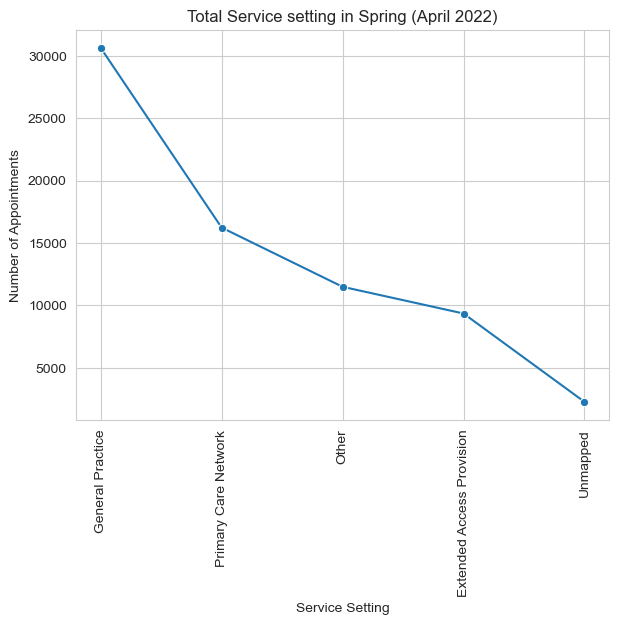

In [50]:
April_data = service_set_answer.loc['April 2022']

April_data_ax = sns.lineplot(x=April_data.index,
            y=April_data,
            data=April_data,
            marker = 'o')

custom_labels = [key for key in April_data.index]


plt.title('Total Service setting in Spring (April 2022)')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

# Assignment 5

## Identify and review the top trending hashtags (#) related to healthcare in the UK based on the data set received from the NHS.

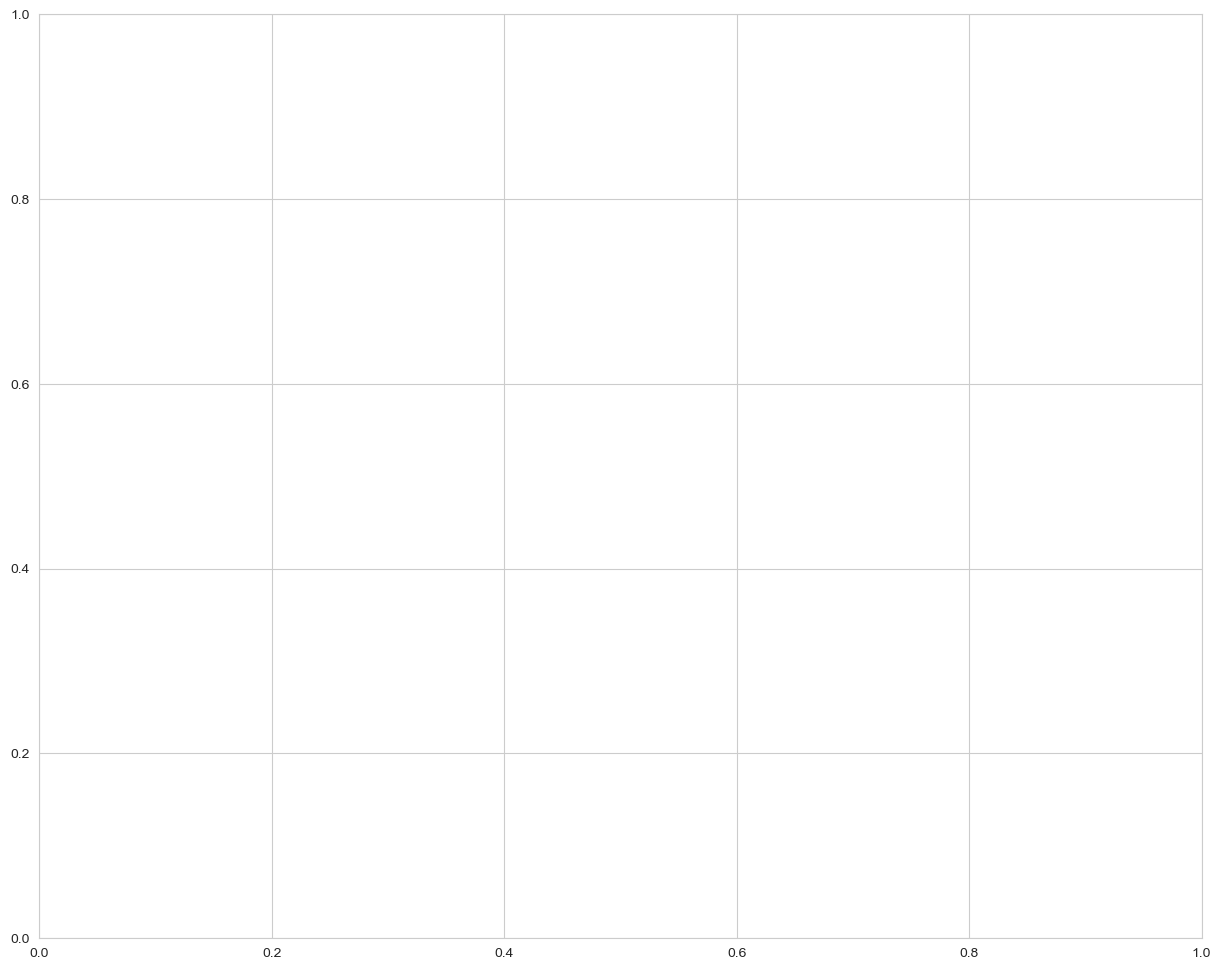

In [51]:
fig, ax = plt.subplots(figsize=(15, 12))
fig_style = 'white'
pd.options.display.max_colwidth = 200

In [52]:
tweets = pd.read_csv('tweets.csv')
#head(1) just to view the first row
tweets.head(1)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [53]:
print(tweets.describe())
print(tweets.info)

           tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000
<bound method DataFrame.info of                  tweet_id  \
0     1567629223795527681   
1     1567582846612553728   
2     1567582787070304256   
3     1567582767625428992   
4     1567582720460570625   
...                   ...   
1169  1567583004209332227   
1170  1567582945342267393   
1171  1567582936014241792   
1172  1567582892892782592   
1173  1567582846847533058   

                                                    

In [54]:
print(tweets['tweet_retweet_count'].value_counts().head())
print(tweets['tweet_favorite_count'].value_counts().head())

0    526
1    215
2    114
3     70
5     35
Name: tweet_retweet_count, dtype: int64
0    1027
1      91
2      16
3      13
4       7
Name: tweet_favorite_count, dtype: int64


In [55]:
tweets.columns

Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')

In [56]:
tweets_text = pd.DataFrame()
tweets_text.head()

""


In [57]:
tag = []

In [58]:
data = pd.Series(tag)
data

/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_56042/2873649226.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data = pd.Series(tag)


Series([], dtype: float64)

In [59]:
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            tag.append(z.lower())
tag

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

In [60]:
# Value Count too find count of relative hashtags

hashtag_df = pd.Series(tag) 
coalated = hashtag_df.value_counts()
coalated

#healthcare      716
#health           80
#medicine         41
#ai               40
#job              38
                ... 
#evestudy          1
#patientdata…      1
#secure            1
#sms               1
\n#csjmu           1
Length: 1754, dtype: int64

In [61]:
#List comprhension to acess key, value 

use = [(key, value) for key, value in coalated.items()]

tag_data = pd.DataFrame({'Word': [key for key, _ in use],
                         'count': [value for _, value in use]})

print(tag_data)

               Word  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]


In [62]:
tag_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


In [63]:
# For hashtags with count greater than 10
relevant_data = tag_data[tag_data['count'] > 10]
print(relevant_data.tail())

                        Word  count
42             #healthcareit     11
43                      #usa     11
44                   #nurses     11
45  drugs\n\n#tipsfornewdocs     11
46    #digitaltransformation     11


#### Quartile range Calc

In [64]:
import numpy
#using numpy to get array of items
sorted_data = np.sort(relevant_data['count'])
sorted_data

array([ 11,  11,  11,  11,  11,  11,  11,  11,  12,  12,  12,  13,  13,
        13,  13,  13,  13,  14,  14,  14,  14,  15,  15,  16,  16,  16,
        16,  17,  17,  17,  18,  18,  23,  24,  24,  24,  25,  25,  25,
        28,  30,  35,  38,  40,  41,  80, 716])

In [65]:
#quartile ranges of the sorted_data 
Q1 = np.percentile(sorted_data,25, interpolation = 'midpoint')
Q2 = np.percentile(sorted_data,50, interpolation = 'midpoint')
Q3 = np.percentile(sorted_data,75, interpolation = 'midpoint')


print(Q3,Q1)

24.0 13.0


/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_56042/3425156052.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(sorted_data,25, interpolation = 'midpoint')
/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_56042/3425156052.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(sorted_data,50, interpolation = 'midpoint')
/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_56042/3425156052.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional optio

In [66]:
#quartile calc
IQR = Q3 - Q1 
IQR

11.0

In [67]:
lower_limit= Q1 - IQR 
upper_limit= Q3 + IQR 

lower_limit

2.0

In [68]:
upper_limit

35.0

In [69]:
Q2

16.0

In [70]:
len(sorted_data)

47

In [71]:
for_chart = relevant_data.copy() 

print(for_chart)

                           Word  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                #digitalhealth     25
9                       #pharma     25
10                   #marketing     25
11                  #medtwitter     24
12                     #biotech     24
13     #competitiveintelligence     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
20                 #coronavirus     16
21             #womeninmedicine     16
22                       #covid     16
23        #competitivemarketing     16
24                    #we

In [72]:
# Limiting the data set to answer question using conditonals based on duplicates and lessthan or equal to

seen = set()
duplicates = []

for every in for_chart['count']:
    if every <= 50:
        if every in seen: 
            duplicates.append(every)
        else: 
            seen.add(every)

now = set(duplicates)

filtered_for_chart = for_chart[~for_chart['count'].isin(now)]

filtered_for_chart

,Word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
14,#meded,23


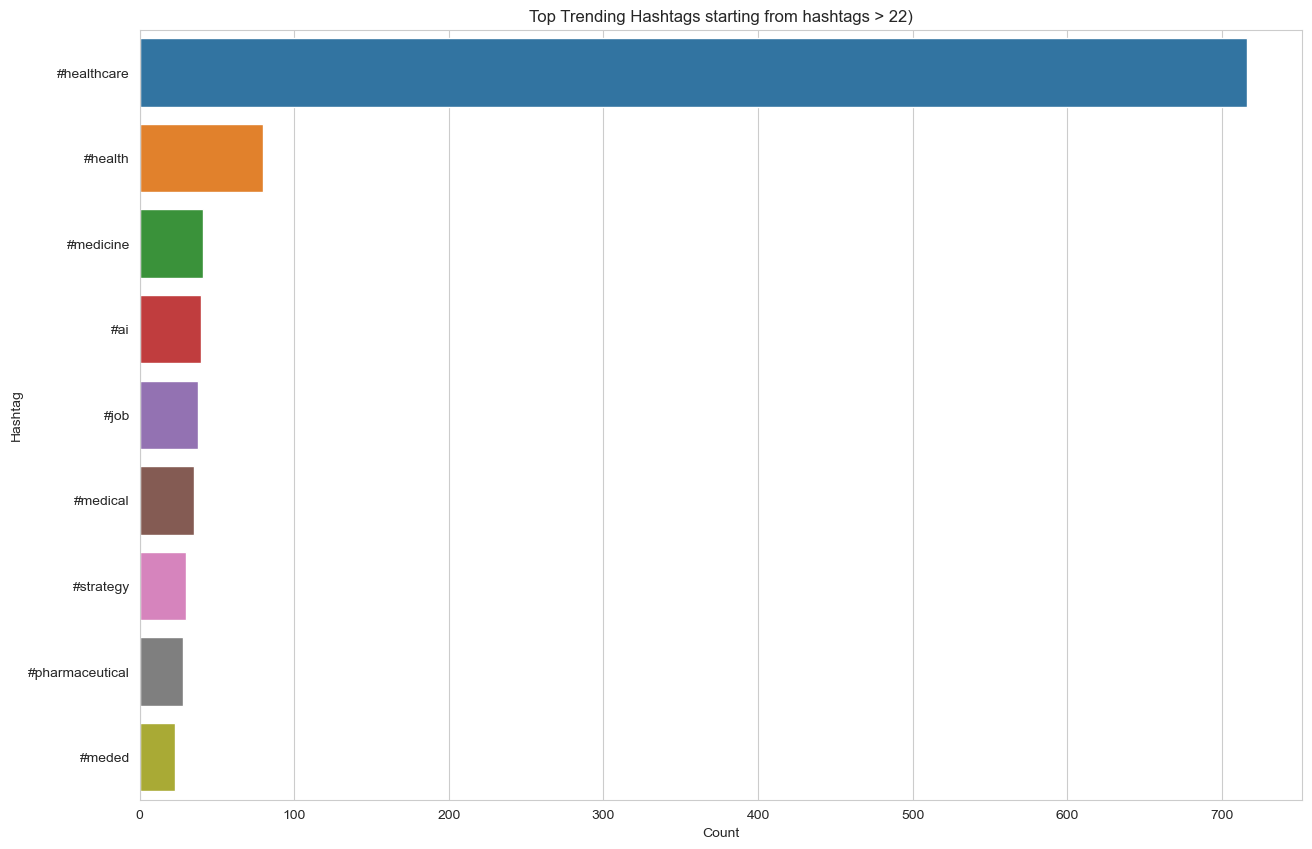

In [73]:
plt.figure(figsize=(15, 10))
#sns barplot to show the highest searched hashtags
sns.barplot(data=filtered_for_chart, x='count', y='Word')
plt.title('Top Trending Hashtags starting from hashtags > 22)')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()


# Assignment 6

#### Review the findings and trends you’ve identified during your data analysis; and, based on your understanding of the data, formulate questions to make recommendations to the NHS. Keep in mind the two main concerns this analysis is solving for.

In [74]:
df = pd.read_csv('appointments_regional.csv')

### View the first five rows of the DataFrame.

In [75]:
df['appointment_month'] = pd.to_datetime(df['appointment_month'])
df

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17


In [76]:
#Value counts of the hcp_type
df['hcp_type'].value_counts()

Other Practice staff    241557
GP                      226036
Unknown                 129228
Name: hcp_type, dtype: int64

In [77]:
ar = pd.DataFrame(df)
ar.head(1)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107


In [78]:
ar.count

<bound method DataFrame.count of        icb_ons_code appointment_month appointment_status hcp_type  \
0         E54000034        2020-01-01           Attended       GP   
1         E54000034        2020-01-01           Attended       GP   
2         E54000034        2020-01-01           Attended       GP   
3         E54000034        2020-01-01           Attended       GP   
4         E54000034        2020-01-01           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050        2022-06-01            Unknown  Unknown   
596817    E54000050        2022-06-01            Unknown  Unknown   
596818    E54000050        2022-06-01            Unknown  Unknown   
596819    E54000050        2022-06-01            Unknown  Unknown   
596820    E54000050        2022-06-01            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
0          Face-to-Face                             1 Day   
1          Face-

In [79]:
ar.columns

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')

### Print the minimum and maximum dates pertaining to the ar data set.

In [80]:
#finding the mi and max dates
min_date = df['appointment_month'].min().date()
max_date = df['appointment_month'].max().date()

print("Min_Date:", min_date)
print("Max_Date:", max_date)

Min_Date: 2020-01-01
Max_Date: 2022-06-01


### Filter the data set to only look at the data from 2021-08 onwards.

In [81]:
#filtering the data set to  greater than or equal to

filtered_df = df[df['appointment_month'] >= '2021-08']

print(filtered_df)

       icb_ons_code appointment_month appointment_status hcp_type  \
3652      E54000034        2021-08-01           Attended       GP   
3653      E54000034        2021-08-01           Attended       GP   
3654      E54000034        2021-08-01           Attended       GP   
3655      E54000034        2021-08-01           Attended       GP   
3656      E54000034        2021-08-01           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050        2022-06-01            Unknown  Unknown   
596817    E54000050        2022-06-01            Unknown  Unknown   
596818    E54000050        2022-06-01            Unknown  Unknown   
596819    E54000050        2022-06-01            Unknown  Unknown   
596820    E54000050        2022-06-01            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
3652       Face-to-Face                             1 Day   
3653       Face-to-Face                    15  to

### View the DataFrame.

## Question 1

#### 1. Create a new data set

In [82]:
relevant_columns = ['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment']

ar_agg = df.groupby(relevant_columns)['count_of_appointments'].sum().reset_index()

print(ar_agg)

      appointment_month hcp_type appointment_status appointment_mode  \
0            2020-01-01       GP           Attended     Face-to-Face   
1            2020-01-01       GP           Attended     Face-to-Face   
2            2020-01-01       GP           Attended     Face-to-Face   
3            2020-01-01       GP           Attended     Face-to-Face   
4            2020-01-01       GP           Attended     Face-to-Face   
...                 ...      ...                ...              ...   
10134        2022-06-01  Unknown            Unknown          Unknown   
10135        2022-06-01  Unknown            Unknown          Unknown   
10136        2022-06-01  Unknown            Unknown          Unknown   
10137        2022-06-01  Unknown            Unknown          Unknown   
10138        2022-06-01  Unknown            Unknown     Video/Online   

      time_between_book_and_appointment  count_of_appointments  
0                                 1 Day                 653846  
1    

In [83]:
#using agg mean to find out average
appointments_per_month = df.groupby('appointment_month')['count_of_appointments'].agg('mean').reset_index()

appointments_per_month.head()

,appointment_month,count_of_appointments
0,2020-01-01,1302.087031
1,2020-02-01,1165.093576
2,2020-03-01,1126.626136
3,2020-04-01,837.057153
4,2020-05-01,895.256407


In [84]:
appointments_per_month['utilisation'] = appointments_per_month['count_of_appointments'] / 30

appointments_per_month.head()

,appointment_month,count_of_appointments,utilisation
0,2020-01-01,1302.087031,43.402901
1,2020-02-01,1165.093576,38.836453
2,2020-03-01,1126.626136,37.554205
3,2020-04-01,837.057153,27.901905
4,2020-05-01,895.256407,29.841880


In [85]:
appointments_per_month['utilisation_percentage'] = (appointments_per_month['utilisation'] / 1200000) * 100
appointments_per_month.head()

,appointment_month,count_of_appointments,utilisation,utilisation_percentage
0,2020-01-01,1302.087031,43.402901,0.003617
1,2020-02-01,1165.093576,38.836453,0.003236
2,2020-03-01,1126.626136,37.554205,0.003130
3,2020-04-01,837.057153,27.901905,0.002325
4,2020-05-01,895.256407,29.841880,0.002487


In [86]:
appointments_per_month['appointment_month'] = appointments_per_month['appointment_month'].dt.strftime('%Y-%m')

In [87]:
appointments_per_month.head()

,appointment_month,count_of_appointments,utilisation,utilisation_percentage
0,2020-01,1302.087031,43.402901,0.003617
1,2020-02,1165.093576,38.836453,0.003236
2,2020-03,1126.626136,37.554205,0.003130
3,2020-04,837.057153,27.901905,0.002325
4,2020-05,895.256407,29.841880,0.002487


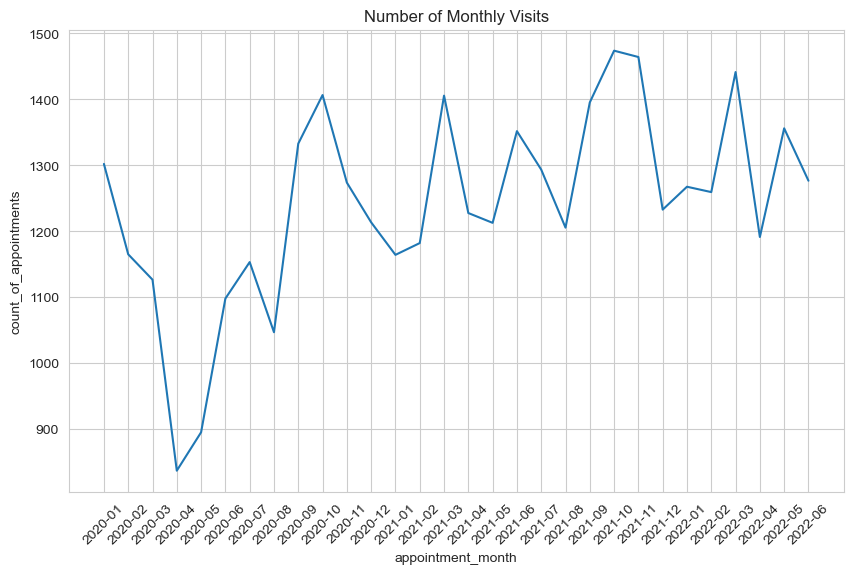

In [88]:
#lineplot to show visualization of utilization
plt.figure(figsize=(10, 6))
sns.lineplot(data=appointments_per_month, x='appointment_month', y='count_of_appointments')
plt.title('Number of Monthly Visits')
plt.xticks(rotation=45)
plt.show()


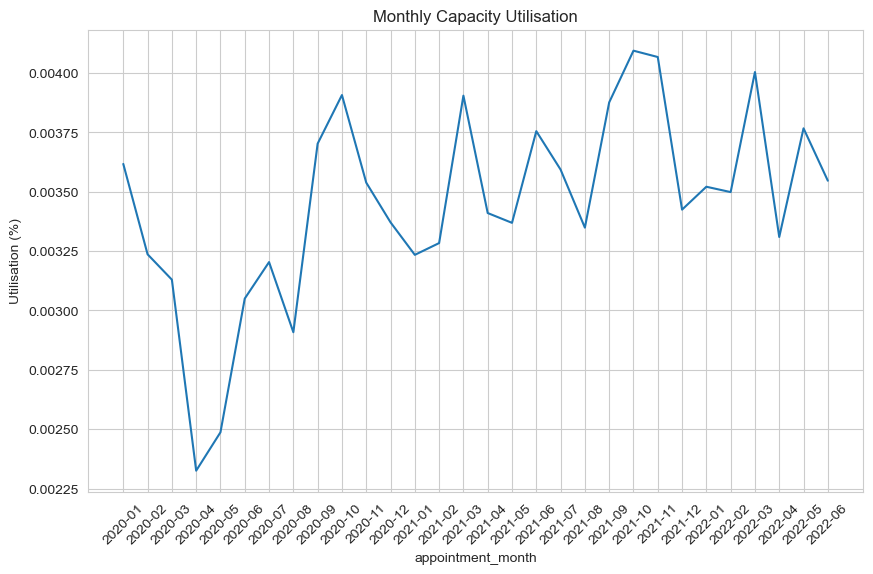

In [89]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=appointments_per_month, x='appointment_month', y='utilisation_percentage')
plt.title('Monthly Capacity Utilisation')
plt.xticks(rotation=45)
plt.ylabel('Utilisation (%)')

plt.show()

# Question 2

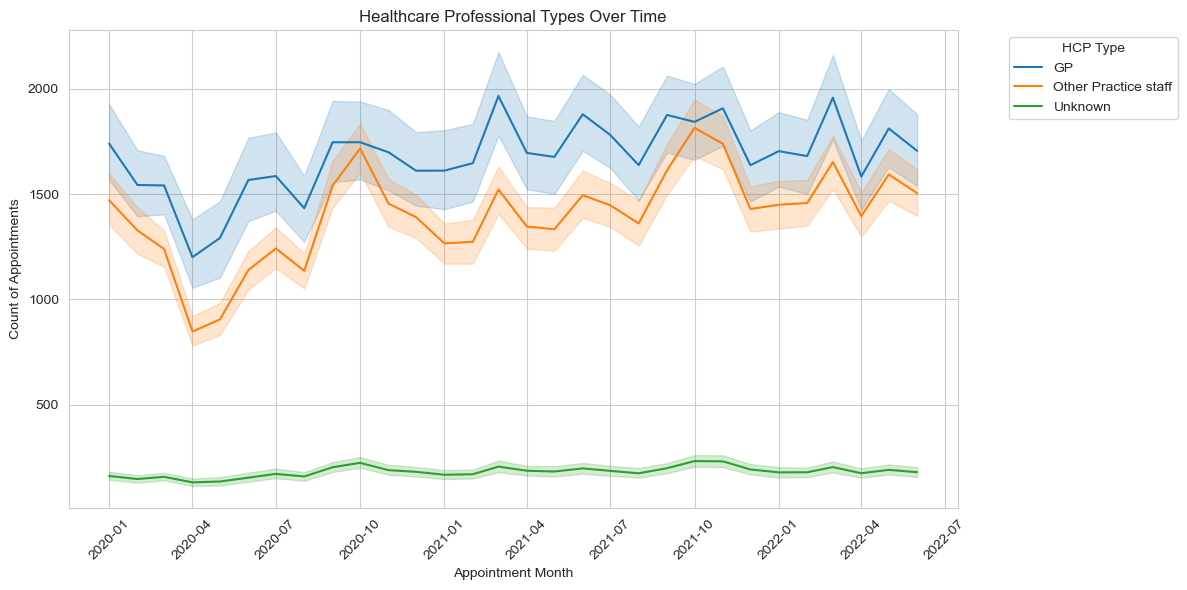

In [90]:
#based on Hcp type created a lineplot [ Hcp type refrence the diffrence colors]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='appointment_month', y='count_of_appointments', hue='hcp_type')
plt.title('Healthcare Professional Types Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.legend(title='HCP Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Question 3 

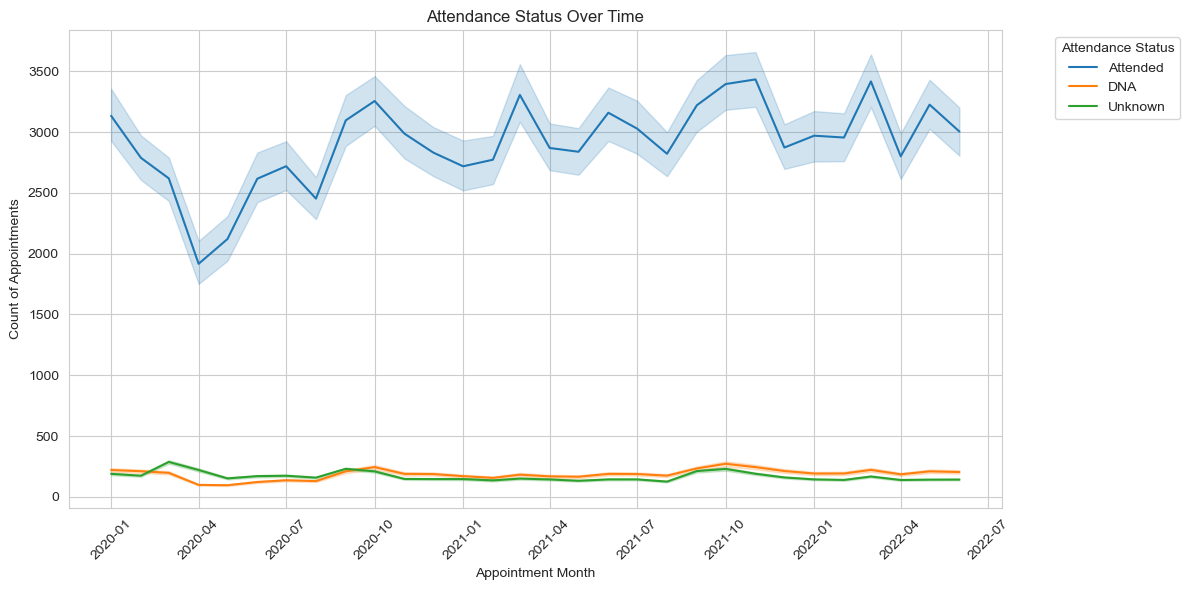

In [91]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='appointment_month', y='count_of_appointments', hue='appointment_status')
plt.title('Attendance Status Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.legend(title='Attendance Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Question 4

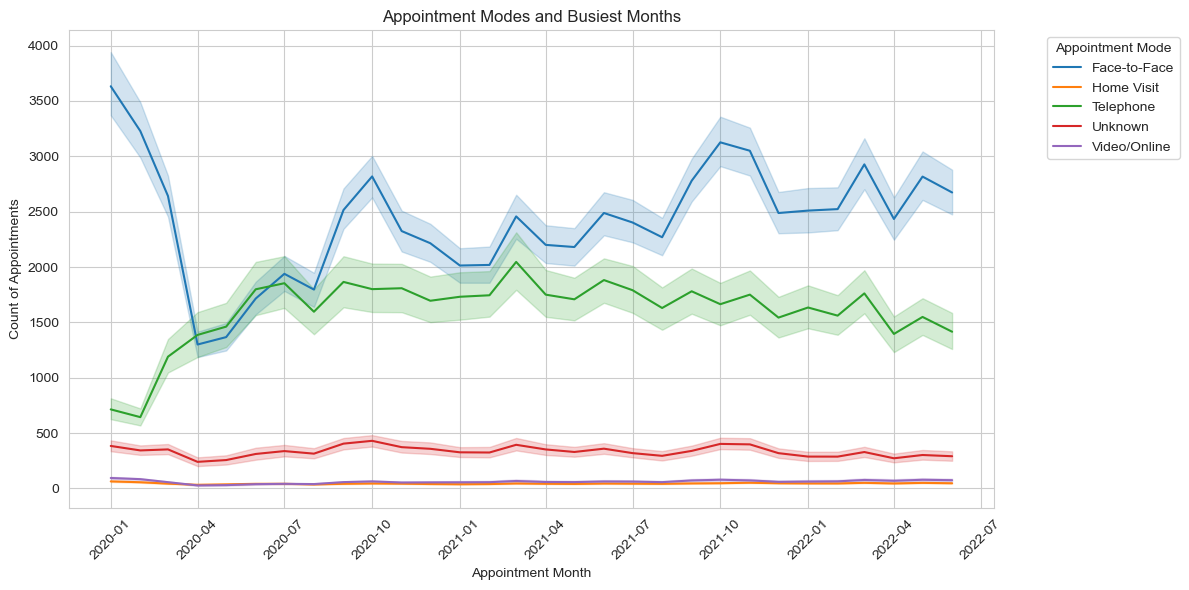

In [92]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='appointment_month', y='count_of_appointments', hue='appointment_mode')
plt.title('Appointment Modes and Busiest Months')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Question 5 

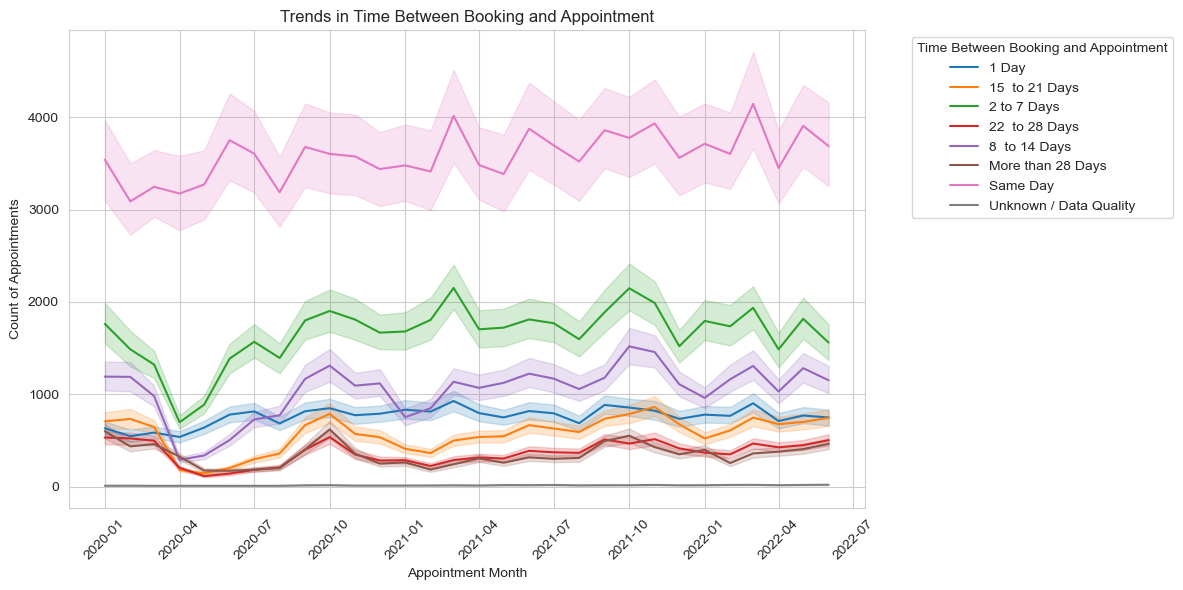

In [93]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment')
plt.title('Trends in Time Between Booking and Appointment')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.legend(title='Time Between Booking and Appointment', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Question 6 

In [94]:
nc_df = nat_categories.copy()
nc_df.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [95]:
appointments_by_month = nc_df.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
appointments_by_month

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


In [96]:
new_dt = service_set_answer.copy()
new_dt

appointment_month  service_setting          
April 2022         General Practice             30645
                   Primary Care Network         16240
                   Other                        11496
                   Extended Access Provision     9355
                   Unmapped                      2276
August 2021        General Practice             31381
                   Primary Care Network         14773
                   Other                        12294
                   Extended Access Provision     9023
                   Unmapped                      2528
December 2021      General Practice             32217
                   Primary Care Network         15915
                   Other                        12532
                   Extended Access Provision     9448
                   Unmapped                      2539
February 2022      General Practice             31224
                   Primary Care Network         16429
                   Other             

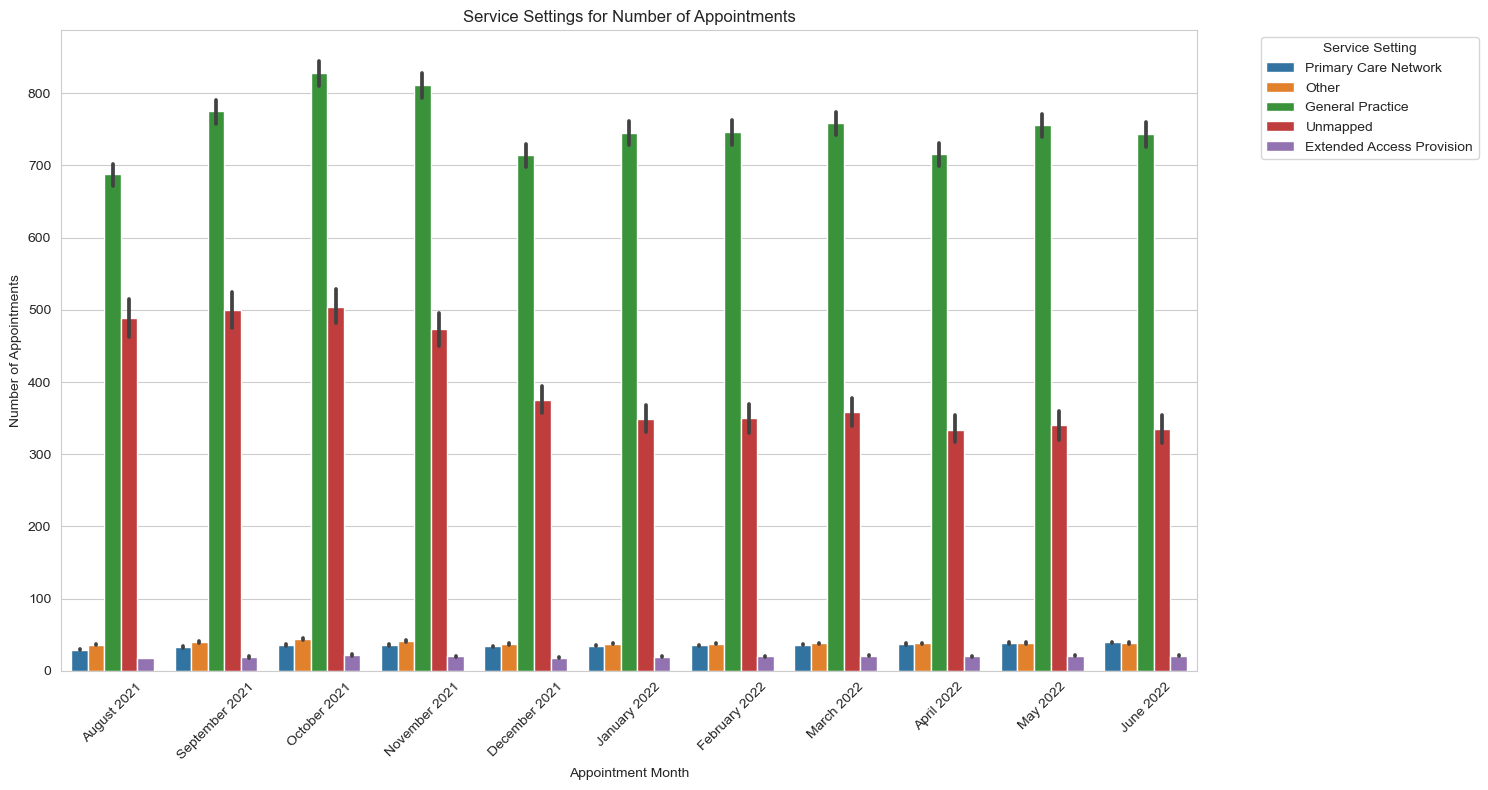

In [97]:
new_pad_reset = new_pad.reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(data=new_pad_reset, x='appointment_month', y='count_of_appointments', hue='service_setting')

plt.title('Service Settings for Number of Appointments')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

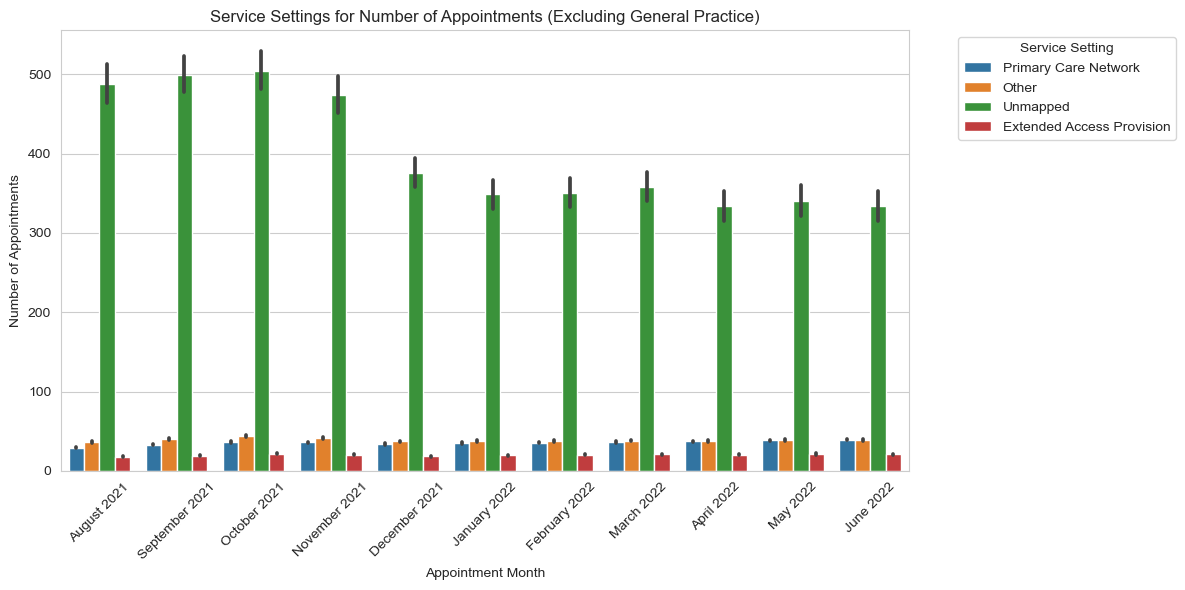

In [98]:
new_pad_reset = new_pad.reset_index()

new_pad_filtered = new_pad_reset[new_pad_reset['service_setting'] != 'General Practice']

plt.figure(figsize=(12, 6))
sns.barplot(data=new_pad_filtered, x='appointment_month', y='count_of_appointments', hue='service_setting')

plt.title('Service Settings for Number of Appointments (Excluding General Practice)')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

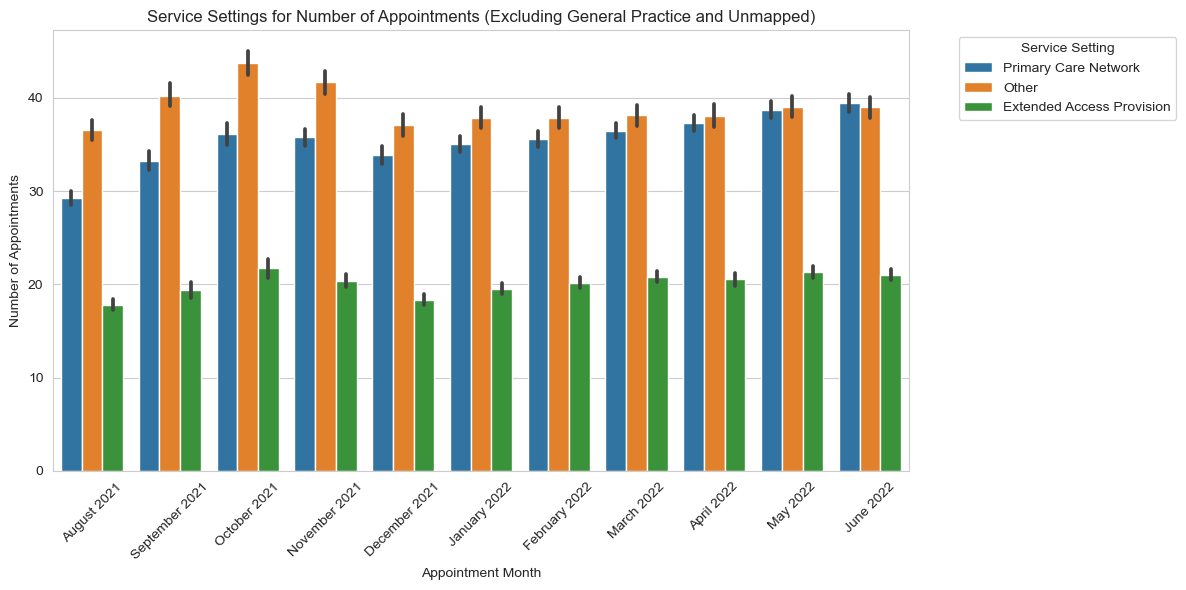

In [99]:
new_pad_reset = new_pad.reset_index()

filtered_service_settings = ['General Practice', 'Unmapped']
new_pad_filtered = new_pad_reset[~new_pad_reset['service_setting'].isin(filtered_service_settings)]

plt.figure(figsize=(12, 6))
sns.barplot(data=new_pad_filtered, x='appointment_month', y='count_of_appointments', hue='service_setting')

plt.title('Service Settings for Number of Appointments (Excluding General Practice and Unmapped)')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Extra Research

In [100]:
extra = df.copy()
extra.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [101]:
extra['appointment_date'] = pd.to_datetime(extra['appointment_month'])

# Group by month and hcp_type and apply an aggregation function 
seg_month = extra.groupby([extra['appointment_date'].dt.strftime('%B'), 'hcp_type'])['count_of_appointments'].sum().reset_index()

seg_month.columns = ['Month', 'HCP_Type', 'Appointment_Count']
print(seg_month)

        Month              HCP_Type  Appointment_Count
0       April                    GP           33167326
1       April  Other Practice staff           28557241
2       April               Unknown            2076306
3      August                    GP           22780469
4      August  Other Practice staff           19835183
5      August               Unknown            1387039
6    December                    GP           24414581
7    December  Other Practice staff           22636138
8    December               Unknown            1625993
9    February                    GP           37165481
10   February  Other Practice staff           32584820
11   February               Unknown            2109149
12    January                    GP           39113909
13    January  Other Practice staff           34032277
14    January               Unknown            2180653
15       July                    GP           25040422
16       July  Other Practice staff           21691691
17       J

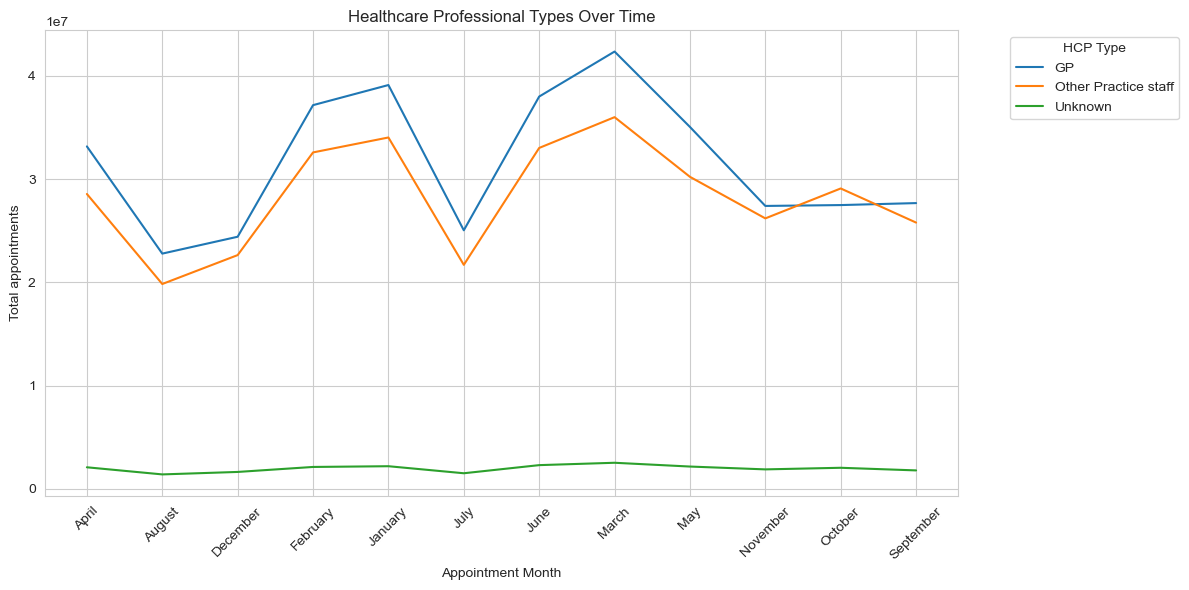

In [102]:
#based on Hcp type created a lineplot [ Hcp type refrence the diffrence colors]

plt.figure(figsize=(12, 6))
sns.lineplot(data=seg_month, x='Month', y='Appointment_Count', 
             hue='HCP_Type')
plt.title('Healthcare Professional Types Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Total appointments')
plt.legend(title='HCP Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [103]:
seg_monthh = extra.groupby([extra['appointment_date'].dt.strftime('%B'), 'hcp_type'])['hcp_type'].count().reset_index(name='HCP_Type_Count')

print(seg_monthh)



   appointment_date              hcp_type  HCP_Type_Count
0             April                    GP           22191
1             April  Other Practice staff           23846
2             April               Unknown           12612
3            August                    GP           14818
4            August  Other Practice staff           15888
5            August               Unknown            8327
6          December                    GP           15023
7          December  Other Practice staff           16047
8          December               Unknown            8717
9          February                    GP           22910
10         February  Other Practice staff           24069
11         February               Unknown           12792
12          January                    GP           23171
13          January  Other Practice staff           24347
14          January               Unknown           12915
15             July                    GP           14863
16            

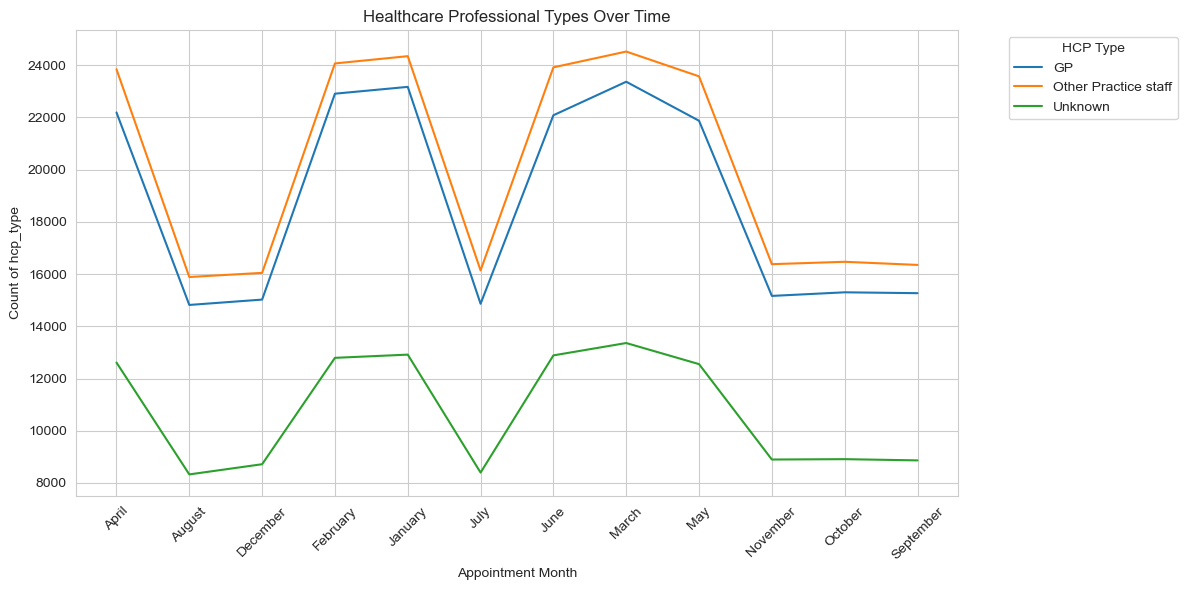

In [104]:
#based on Hcp type created a lineplot [ Hcp type refrence the diffrence colors]

plt.figure(figsize=(12, 6))
sns.lineplot(data=seg_monthh, x='appointment_date', y='HCP_Type_Count', 
             hue='hcp_type')
plt.title('Healthcare Professional Types Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Count of hcp_type')
plt.legend(title='HCP Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()